In [1]:
#  %pip install matplotlib
#  %pip install soundfile
#  %pip install ipywidgets

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile
from IPython.display import Audio

In [3]:
# INFINITECLIP
# This function implements infinite clipping distortion. Amplitude values
# of the input signal that are positive are changed to 1 in the output signal.
# Amplitude values of the input signal that are negative are changed to -1 in
# the output signal.
#
# See also HARDCLIP, DISTORTIONEXAMPLE

def infiniteClip(x):
    
     
    
    return np.where(x >= 0, 1.0, -1.0)

In [4]:
# HALFWAVERECTIFICATION
# This function implements half-wave rectification distortion. Amplitude values
# of the input signal that are negative are changed to zero in the output signal.
#
# See also FULLWAVERECTIFICATION, DISTORTIONEXAMPLE

def halfWaveRectification(x):
    
    return np.where(x >= 0, x, 0)
    

In [5]:
# FULLWAVERECTIFICATION
# This function implements full-wave rectification distortion. Amplitude values
# of the input signal that are negative are changed to positive in the output
# signal.
#
# See also HALFWAVERECTIFICATION, DISTORTIONEXAMPLE

def fullWaveRectification(x):
    return np.abs(x)

In [6]:
# HARDCLIP
# This function implements hard-clipping distortion. Amplitude values of the
# input signal that are greater than a threshold are clipped.
#
# Input variables
#   x: signal to be processed
#   thresh: maximum amplitude where clipping occurs
#
# See also INFINITECLIP, PIECEWISE, DISTORTIONEXAMPLE

def hardClipping(x, thresh):
    return np.clip(x, -thresh, thresh)

In [7]:
# CUBICDISTORTION
# This function implements cubic soft-clipping distortion. An input parameter
# 'a' is used to control the amount of distortion applied to the input
# signal.
#
# Input variables
#   x: input signal
#   a: drive amount (0-1), amplitude of 3rd harmonic
#
# See also ARCTANDISTORTION, DISTORTIONEXAMPLE

def cubicDistortion(x, a):
    return x - (a * (1/3) * (x**3))

In [8]:
# ARCTANDISTORTION
# This function implements arctangent soft-clipping distortion. An input
# parameter 'alpha' is used to control the amount of distortion applied to
# the input signal.
#
# Input variables
#   x: input signal
#   alpha: drive amount (1-10)
#
# See also CUBICDISTORTION, DISTORTIONEXAMPLE

def arctanDistortion(x, alpha):
    y = (2/np.pi) * np.arctan(x * alpha)
    return y

In [9]:
# EXPONENTIAL
# This function implements exponential soft-clipping distortion. An input
# parameter 'drive' is used to control the amount of distortion applied to
# the input signal.
#
# Input variables
#   x: input signal
#   drive: drive amount (1-10)
#
# See also CUBICDISTORTION, ARCTANDISTORTION, DISTORTIONEXAMPLE

def exponential(x, drive):
    return np.sign(x) * (1 - np.exp(-np.abs(drive * x)))

In [26]:
# PIECEWISE
# This function implements a piece-wise distortion algorithm. Within one
# operating region, the input signal is not distorted. When the signal is
# outside of that operating region, it is clipped.
#
# See also HARDCLIP, DISTORTIONEXAMPLE

def piecewise(x):
     conds = [ np.abs(x) < 1/3, ((np.abs(x) >= 1/3) & (np.abs(x) <= 2/3)), np.abs(x) > 2/3]
     funcs = [lambda x: 2 * x, lambda x: np.sign(x) * pow(3 - (2 - 3 * np.abs(x)),2)/3, lambda x: np.sign(x)]
     return np.piecewise(x,conds,funcs)
    


In [17]:
# DIODE
# This function implements the Shockley ideal diode equation for audio signals
# with an amplitude between -1 and 1 FS.
#
# See also ASYMMETRICAL, DISTORTIONEXAMPLE
## by making all the < 0 signal to 0, from the waveform it looks like a smoother version of half wave rectification? 

def diode(x):
    # Diode Characteristics
    Vt = 0.0253 # thermal voltage
    eta = 1.68 # emission coefficient
    Is = 0.105 # saturation current
    return Is * (np.exp(0.1 * x/(eta * Vt)) - 1)

In [38]:
# BITREDUCT
# This function creates a bit reduction or bit crushing distortion. It uses
# an input variable, 'nBits', to determine the number of amplitude values
# in the output signal. This algorithm can have a fractional number of bits,
# similar to the processing found in some audio plug-ins.
#
# Input variables
#   x: input signal
#   nBits: scalar for the number of desired bits
#
# See also DISTORTIONEXAMPLE, ROUND, CEIL, FLOOR, FIX

def bitReduction(x, nBits):
    # Determine the desired number of possible amplitude values
    ampValues = pow(2, nBits)
    print(f"ampValues: {ampValues}")
    # Shrink the full-scale signal (-1 to 1, peak-to-peak) to fit
    # within range of 0 to 1
    prepInput = 0.5 * x + 0.5

    # Scale the signal to fit within the range of the possible values
    scaleInput = ampValues * prepInput

    # Round the signal to the nearest integers
    roundInput = np.round(scaleInput)

    # Invert the scaling to fit the original range
    prepOut = roundInput/ampValues

    # Fit in full-scale range
    y = 2 * prepOut - 1

    return y

In [13]:
# ASYMMETRICAL
# This function creates a distortion effect that is neither 'even' or 'odd'.
# Therefore, the resulting signal has both even and odd harmonics.
#
# Input variables
#   x: input signal
#   dc: offset amount
#
# See also CUBICDISTORTION, DISTORTIONEXAMPLE

def asymmetrical(x, dc):
    N = len(x)
    xOffset = x + dc # introduce DC offset
    yOffset = np.zeros([N, 1])

    for n in range(N):
        if np.abs(xOffset[n]) > 1:
            # Conditional to ensure 'out' is a monotonically increasing function
            xOffset[n] = np.sign(xOffset[n])

        # Nonlinear distortion function
        yOffset[n] = xOffset[n] - (1/5) * pow(xOffset[n], 5)

    y = yOffset - dc # remove DC offset

    return y


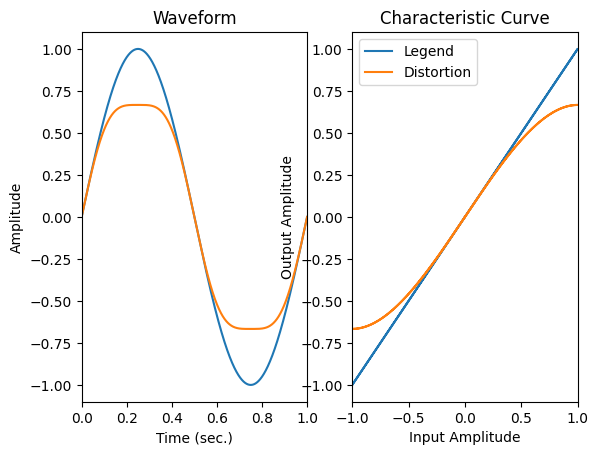

In [14]:
# DISTORTIONEXAMPLE
# This script is used to test various distortion functions. Each algorithm
# can be analyzed by 'uncommenting' the code under each section. The waveform
# and characteristic curve is plotted for each function.

Fs = 48000
Ts = 1/Fs
f = 1
t = np.arange(0, Fs * 1) * Ts

x = np.sin(2 * np.pi * f * t) # used as input signal for each distortion

# # Infinite clipping
#y = infiniteClip(x)

# # Half-wave rectification
# y = halfWaveRectification(x)

# # Full-wave Rectification
# y = fullWaveRectification(x)

# # Hard-clipping
# thresh = 0.5
# y = hardClipping(x, thresh)

# # Cubic soft-clipping
alpha = 1
y = cubicDistortion(x, alpha)

# # Arctangent distortion
#alpha = 5
#y = arctanDistortion(x, alpha)

# # Sine distortion
# y = np.sin((np.pi/2) * x)

# # Exponential soft-clipping
# drive = 4
# y = exponential(x, drive)

# # Piece-wise overdrive,Diode clipping,Asymmetrical distortion,Bit crushing,Dither Noise
# y = piecewise(x)

# # Diode clipping
# y = diode(x)

# # Asymmetrical distortion
# dc = -0.25
# y = asymmetrical(x, dc)

# # Bit crushing
# nBits = 8
# y = bitReduction(x, nBits)

# Dither Noise
#dither = 0.003 * np.random.randn(np.size(x))
#nBits = 4
#y = bitReduction(x + dither, nBits)

# Plotting
plt.figure(1)
plt.subplot(1,2,1) # Waveform
plt.plot(t, x, t, y)
plt.axis([0, 1, -1.1, 1.1])
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.title('Waveform')

plt.subplot(1,2,2) # Characteristic Curve
plt.plot(x, x, x, y)
plt.axis([-1, 1, -1.1, 1.1])
plt.xlabel('Input Amplitude')
plt.ylabel('Output Amplitude')
plt.legend(['Legend', 'Distortion'])
plt.title('Characteristic Curve')
plt.show()

In [ ]:
# PARALLEL DISTORTION
# This script demonstrates how to create parallel distortion. It allows for the
# 'dry' unprocessed signal to be blended with the 'wet' processed signal.
#
# See also ARCTANDISTORTION
# Alpha - amount of distortion

import ipywidgets as widgets 
from IPython.display import display, Audio, clear_output
# if the file is not mono
[x, Fs] = soundfile.read('./../Audio Files/folkGuitar.wav')
info = soundfile.info('./../Audio Files/folkGuitar.wav')

#print(Fs)
#print(x.shape) #row : number of samples, column: left, right channel and len = number of rows
if len(x.shape) > 1:
    x = x[:,0] # only take left channel

def applyEffect(effectType, alpha, mix, dc, nBitsOpt):
    with out:
        clear_output(wait=True)
        #print(f"x:{x}  alpha:{alpha}")
        match effectType:
            case 'Arctangent dist':
                dist = arctanDistortion(x,alpha)
            
            case 'Infinite clip':
                dist = infiniteClip(x)
            
            case 'Half-wave rectification':
                dist = halfWaveRectification(x)
            
            case 'Full-wave Rectification':
                dist = fullWaveRectification(x)
            
            case 'Hard-clipping':
                thresh = 1/alpha
                dist = hardClipping(x, thresh)
            
            case 'Cubic soft-clipping':
                a = 1 / alpha
                dist = cubicDistortion(x, a)
            
            case 'Sine distortion':
                dist = np.sin((np.pi/2) * x)
            
            case 'Exponential soft-clipping':
                drive = np.interp(alpha,[1,100],[1,30])
                dist = exponential(x, drive)
            
            case 'Piece-wise overdrive':
                dist = piecewise(x)
            
            case 'Diode clipping':
                dist = diode(x)
            
            case 'Asymmetrical distortion':
                dist = asymmetrical(x, dc)
            
            case 'Bit crushing':
                opt ={"2 bits" : 2, "4 bits": 4, "6 bits": 6,"8 bits": 8, "16 bits":16}
                nBits = opt[nBitsOpt]
                print( f"nBitsOpt: {nBitsOpt} nBits: {nBits}")
                dist = bitReduction(x, nBits)
            
            case 'Dither Nois':
                dither = 0.003 * np.random.randn(np.size(x))
                dist = bitReduction(x + dither, nBits)
            
            case 'None':
                dist = x
    
        # Wet path - distortion
        # Pick an arbitrary 'wet/dry mix' value
        #mix = 50 # Experiment with values from 0-100
        # Convert to a linear gain value
        g = mix/100
    
        # Add together 'wet/dry' signals
        y = g * dist + (1 - g) * x
    
        # Listen to result
        print(f"Distortion type: {effectType} | Alpha: {alpha} | Mix: {mix}%")
        print("Original (bit depth: {info.subtype_info}")
        display(Audio(x, rate=Fs))
    
        # 顯示處理後的聲音
        print("With distortion effect：")
        display(Audio(y, rate=Fs))

#Gui
out = widgets.Output()
OPTIONS = [ 'None',
            'Arctangent dist',
            'Infinite clip',
            'Half-wave rectification',
            'Full-wave Rectification',
            'Hard-clipping',
            'Cubic soft-clipping',
            'Sine distortion',
            'Exponential soft-clipping',
            'Piece-wise overdrive',
            'Diode clipping',
            'Asymmetrical distortion',
            'Bit crushing',
            'Dither Noise' ]
NBITS = ['2 bits', '4 bits', '6 bits', '8 bits', '16 bits']
distortionMenu = widgets.Dropdown(options =OPTIONS, value ='None', description = 'Choose Distortion:')
nbitDropDown = widgets.Dropdown(options = NBITS, value ='2 bits', description = 'Choose nBits:')
alphaSlider = widgets.IntSlider(value = 8, min = 1, max = 100, step = 1, description = 'Alpha value')
mixSlider = widgets.IntSlider(value = 50, min = 1, max = 100, step = 1, description = 'Mix value')
#threshSlider = widgets.IntSlider(value = 8, min = 1, max = 100, step = 1, description = 'thresh value')
#driveSlider = widgets.IntSlider(value = 50, min = 1, max = 100, step = 1, description = 'drive value')
dcSlider = widgets.IntSlider(value = 50, min = 1, max = 100, step = 1, description = 'dc value')
#nBitsSlider = widgets.IntSlider(value = 50, min = 1, max = 100, step = 1, description = 'nBits value')
controlPanel = widgets.interactive_output(applyEffect, {'effectType': distortionMenu, 'alpha': alphaSlider, 'mix': mixSlider, 'dc': dcSlider, 'nBitsOpt': nbitDropDown})
ui = widgets.VBox([distortionMenu, alphaSlider, mixSlider,nbitDropDown, out])
display(ui)


原始位元格式: PCM_24
原始位元深度 (估計): Signed 24 bit PCM
